<a href="https://colab.research.google.com/github/AppalaSaikrishna/python_list/blob/main/AD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import re

In [ ]:
text = """
Hello world! Contact us at info@example.com or support123@company.org. Follow us on social media: #AI #MachineLearning.
Visit <a href="http://example.com">our website</a> for more details. This is a test with number 1234.
"""

In [ ]:
emails=re.findall(r'[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}',text)
print(emails)

['info@example.com', 'support123@company.org']


In [ ]:
 text = """
Hello world! Contact us at info@example.com or support123@company.org. Follow us on social media: #AI #MachineLearning.
Visit <a href="http://example.com">our website</a> for more details. This is a test with number 1234.
"""

In [ ]:
import pandas as pd
dataset = pd.read_csv("tweets.csv",encoding = "ISO-8859-1", on_bad_lines='skip')
dataset.head(3)

,Unnamed: 0,X,text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,replyToUID,statusSource,screenName,retweetCount,isRetweet,retweeted
0,1,1,RT @rssurjewala: Critical question: Was PayTM ...,False,0,NaN,2016-11-23 18:40:30,False,NaN,8.014957e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",HASHTAGFARZIWAL,331,True,False
1,2,2,RT @Hemant_80: Did you vote on #Demonetization...,False,0,NaN,2016-11-23 18:40:29,False,NaN,8.014957e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",PRAMODKAUSHIK9,66,True,False
2,3,3,"RT @roshankar: Former FinSec, RBI Dy Governor,...",False,0,NaN,2016-11-23 18:40:03,False,NaN,8.014955e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",rahulja13034944,12,True,False


In [ ]:
def gen_freq(text):
  word_list = []
  for tw_word in text.split():
    word_list.extend(tw_word)
  word_freq = pd.Series(word_list).value_counts()
  word_freq[:10]
  return word_freq

In [ ]:
word_freq = gen_freq(dataset.text.str)
word_freq

,count
RT,11053
to,7650
is,5152
in,4491
the,4331
...,...
#News,1
notes|,1
https://t.co/ECl4oIzdHA,1
https://t.co/9MjFtLtCtR,1


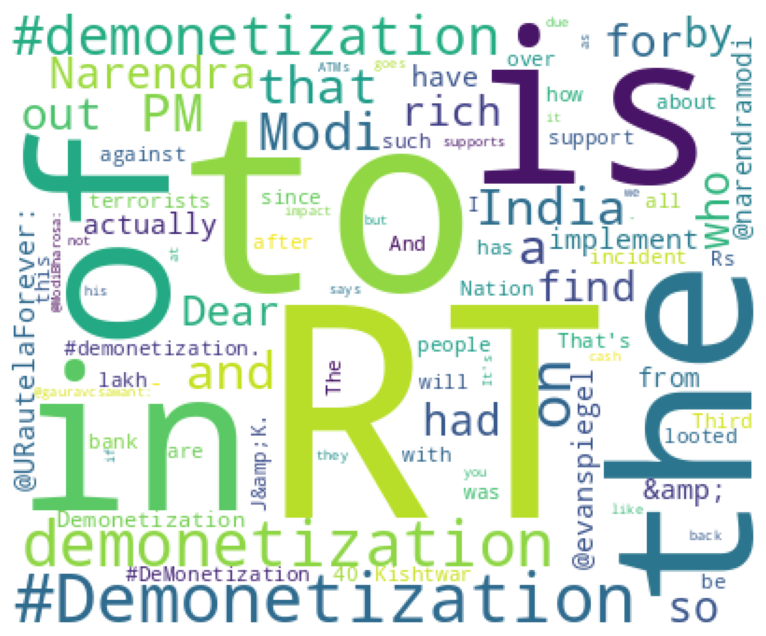

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
wc= WordCloud(width=400, height=330, max_words=200,background_color='white').generate_from_frequencies(word_freq)
plt.figure(figsize=(12, 8))
plt.imshow(wc)
plt.axis('off')
plt.show()

In [ ]:
import re
def clean_text(text):
  text = re.sub(r'RT', '' text)

SyntaxError: invalid syntax. Perhaps you forgot a comma? (<ipython-input-39-32375bff925e>, line 3)

In [ ]:
import pandas as pd
text = ['Saeah lives in a hut in the village.',
        'She has an apple tree in her backyard.',
        'The apples are red in colour.']

df = pd.DataFrame({'Sentence':text})
df

,Sentence
0,Saeah lives in a hut in the village.
1,She has an apple tree in her backyard.
2,The apples are red in colour.


In [ ]:
!pip install spacy

In [ ]:
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 23.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
import spacy
nlp = spacy.load("en_core_web_sm")
token = []
pos = []
for sent in nlp.pipe(df['Sentence']):
  if sent.has_annotation('DEP'):
    token.append([word.text for word in sent])
    pos.append([word.pos_ for word in sent])

In [ ]:
token

[['Saeah', 'lives', 'in', 'a', 'hut', 'in', 'the', 'village', '.'],
 ['She', 'has', 'an', 'apple', 'tree', 'in', 'her', 'backyard', '.'],
 ['The', 'apples', 'are', 'red', 'in', 'colour', '.']]

In [ ]:
pos

[['INTJ', 'VERB', 'ADP', 'DET', 'NOUN', 'ADP', 'DET', 'NOUN', 'PUNCT'],
 ['PRON', 'VERB', 'DET', 'NOUN', 'NOUN', 'ADP', 'PRON', 'NOUN', 'PUNCT'],
 ['DET', 'NOUN', 'AUX', 'ADJ', 'ADP', 'NOUN', 'PUNCT']]

In [ ]:
df['token']=token
df['pos']=pos
df.head()

,Sentence,token,pos
0,Saeah lives in a hut in the village.,"[Saeah, lives, in, a, hut, in, the, village, .]","[INTJ, VERB, ADP, DET, NOUN, ADP, DET, NOUN, P..."
1,She has an apple tree in her backyard.,"[She, has, an, apple, tree, in, her, backyard, .]","[PRON, VERB, DET, NOUN, NOUN, ADP, PRON, NOUN,..."
2,The apples are red in colour.,"[The, apples, are, red, in, colour, .]","[DET, NOUN, AUX, ADJ, ADP, NOUN, PUNCT]"


In [ ]:
df['noun']=df.apply(lambda x: x['pos'].count('NOUN'),axis=1)
df['verb']=df.apply(lambda x: x['pos'].count('VERB'),axis=1)
df['adj']=df.apply(lambda x: x['pos'].count('ADJ'),axis=1)
df['punct']=df.apply(lambda x: x['pos'].count('PUNCT'),axis=1)
df

,Sentence,token,pos,noun,verb,adj,punct
0,Saeah lives in a hut in the village.,"[Saeah, lives, in, a, hut, in, the, village, .]","[INTJ, VERB, ADP, DET, NOUN, ADP, DET, NOUN, P...",2,1,0,1
1,She has an apple tree in her backyard.,"[She, has, an, apple, tree, in, her, backyard, .]","[PRON, VERB, DET, NOUN, NOUN, ADP, PRON, NOUN,...",3,1,0,1
2,The apples are red in colour.,"[The, apples, are, red, in, colour, .]","[DET, NOUN, AUX, ADJ, ADP, NOUN, PUNCT]",2,0,1,1


In [ ]:
import nltk
nltk.download('stopwords')
import nltk
nltk.download('punkt_tab')



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
stop_words = set( stopwords.words('english'))
tokens = sent_tokenize(text)
for i in tokens:
  words = nltk.word_tokenize(i)
  words = [w for w in words if not w in stop_words]
  tags = nltk.pos_tag(words)
tags


TypeError: expected string or bytes-like object, got 'list'

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df = pd.read_csv('tripadvisor_hotel_reviews.csv')
df.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [ ]:
def  ratings(rating):
  if rating>3 and rating<=5:
    return "Positive"
  if rating>0 and rating<=3:
    return "Negative"


In [ ]:
df['Rating'] = df['Rating'].apply(ratings)

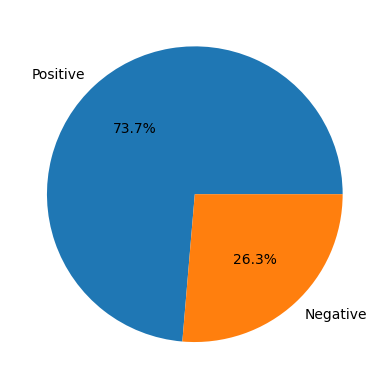

In [ ]:
plt.pie(df['Rating'].value_counts(),
        labels=df['Rating'].unique().tolist(),
        autopct='%1.1f%%')
plt.show()

In [ ]:
length = len(df['Review'][0])
print(f'Length of a simple review: {length}')

Length of a simple review: 593


In [ ]:
df['Length'] = df['Review'].str.len()
df.head()

,Review,Rating,Length
0,nice hotel expensive parking got good deal sta...,Positive,593
1,ok nothing special charge diamond member hilto...,Negative,1689
2,nice rooms not 4* experience hotel monaco seat...,Negative,1427
3,"unique, great stay, wonderful time hotel monac...",Positive,600
4,"great stay great stay, went seahawk game aweso...",Positive,1281


In [ ]:
word_count = df['Review'][0].split()
print(f'Word count of a simple review: {len(word_count)}')

Word count of a simple review: 87


In [ ]:
def word_count(review):
  review_list = review.split()
  return len(review_list)

In [ ]:
df['Word Count'] = df['Review'].apply(word_count)
df.head()

,Review,Rating,Length,Word Count
0,nice hotel expensive parking got good deal sta...,Positive,593,87
1,ok nothing special charge diamond member hilto...,Negative,1689,250
2,nice rooms not 4* experience hotel monaco seat...,Negative,1427,217
3,"unique, great stay, wonderful time hotel monac...",Positive,600,89
4,"great stay great stay, went seahawk game aweso...",Positive,1281,191


In [ ]:
df['mean_word_length'] = df['Review'].map(lambda rev: np.mean([len(word) for word in rev.split()]))
df.head()

,Review,Rating,Length,Word Count,mean_word_length
0,nice hotel expensive parking got good deal sta...,Positive,593,87,5.804598
1,ok nothing special charge diamond member hilto...,Negative,1689,250,5.752000
2,nice rooms not 4* experience hotel monaco seat...,Negative,1427,217,5.571429
3,"unique, great stay, wonderful time hotel monac...",Positive,600,89,5.730337
4,"great stay great stay, went seahawk game aweso...",Positive,1281,191,5.701571


In [ ]:
features = df.columns.tolist()[2:]
df = df.drop(features, axis=1)
df.head()


,Review,Rating
0,nice hotel expensive parking got good deal sta...,Positive
1,ok nothing special charge diamond member hilto...,Negative
2,nice rooms not 4* experience hotel monaco seat...,Negative
3,"unique, great stay, wonderful time hotel monac...",Positive
4,"great stay great stay, went seahawk game aweso...",Positive


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  20491 non-null  object
 1   Rating  20491 non-null  object
dtypes: object(2)
memory usage: 320.3+ KB


In [ ]:
import re
from nltk.corpus import stopwords
def clean(review):
  review = review.lower()
  review = re.sub('[^a-z A-z 0-9-]+', '', review)
  review = ' '.join([word for word in review.split() if word not in stopwords.words('english')])
  return review

In [ ]:
df['Review'] = df['Review'].apply(clean)
df.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,Positive
1,ok nothing special charge diamond member hilto...,Negative
2,nice rooms 4 experience hotel monaco seattle g...,Negative
3,unique great stay wonderful time hotel monaco ...,Positive
4,great stay great stay went seahawk game awesom...,Positive


In [ ]:
df['Review'][0]



'nice hotel expensive parking got good deal stay hotel anniversary arrived late evening took advice previous reviews valet parking check quick easy little disappointed non-existent view room room clean nice size bed comfortable woke stiff neck high pillows soundproof like heard music room night morning loud bangs doors opening closing hear people talking hallway maybe noisy neighbors aveda bath products nice goldfish stay nice touch taken advantage staying longer location great walking distance shopping overall nice experience pay 40 parking night'

In [ ]:
def corpus(text):
  text_list = text.split()
  return text_list

In [ ]:
df['Review_lists']=df['Review'].apply(corpus)
df.head()

,Review,Rating,Review_lists
0,nice hotel expensive parking got good deal sta...,Positive,"[nice, hotel, expensive, parking, got, good, d..."
1,ok nothing special charge diamond member hilto...,Negative,"[ok, nothing, special, charge, diamond, member..."
2,nice rooms 4 experience hotel monaco seattle g...,Negative,"[nice, rooms, 4, experience, hotel, monaco, se..."
3,unique great stay wonderful time hotel monaco ...,Positive,"[unique, great, stay, wonderful, time, hotel, ..."
4,great stay great stay went seahawk game awesom...,Positive,"[great, stay, great, stay, went, seahawk, game..."


In [ ]:
from tqdm import trange
corpus = []
for i in trange(min(100, df.shape[0]), ncols=150, nrows=10, colour='green', smoothing=0.8):
  corpus += df['Review_lists'][i]
len(corpus)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 67519.38it/s]


8547

In [ ]:
from collections import Counter
mostCommon = Counter(corpus).most_common(10)
mostCommon

[('hotel', 235),
 ('room', 199),
 ('great', 107),
 ('stay', 93),
 ('staff', 84),
 ('seattle', 79),
 ('nt', 76),
 ('good', 72),
 ('nice', 67),
 ('location', 67)]

In [ ]:
words=[]
freq=[]
for word, count in mostCommon:
  words.append(word)
  freq.append(count)

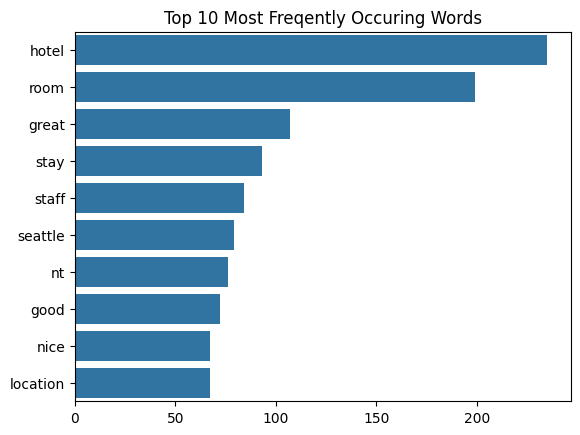

In [ ]:
import seaborn as sns
sns.barplot(x=freq,y=words)
plt.title('Top 10 Most Freqently Occuring Words')
plt.show()

In [ ]:
doc_trump = "Mr. Trump became president after winning the political election.  though he lost the support of some rebublican friends, Trump is friends with President putin"

doc_election = "President Trump says putin had no political interference is the election outcome.He says it was a witchhunt by political parties.He claimed President putin is a friend whi had nothing to do with the election"

doc_putin = "post elections, Valdimir putin became President of Russia.President putin had served as the Prime MInister earlier in his political career"

documents = [doc_trump,doc_election,doc_putin]

In [ ]:
documents

['Mr. Trump became president after winning the political election.  though he lost the support of some rebublican friends, Trump is friends with President putin',
 'President Trump says putin had no political interference is the election outcome.He says it was a witchhunt by political parties.He claimed President putin is a friend whi had nothing to do with the election',
 'post elections, Valdimir putin became President of Russia.President putin had served as the Prime MInister earlier in his political career']

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
count_vect=CountVectorizer(stop_words='english')
count_vect=CountVectorizer()
sparse_matrix=count_vect.fit_transform(documents)
doc_term_matrix=sparse_matrix.todense()
df=pd.DataFrame(doc_term_matrix, columns=count_vect.get_feature_names_out(),index=['doc_trump','doc_election','doc_putin'])
df

,after,as,became,by,career,claimed,do,earlier,election,elections,...,the,though,to,trump,valdimir,was,whi,winning,witchhunt,with
doc_trump,1,0,1,0,0,0,0,0,1,0,...,2,1,0,2,0,0,0,1,0,1
doc_election,0,0,0,1,0,1,1,0,2,0,...,2,0,1,1,0,1,1,0,1,1
doc_putin,0,1,1,0,1,0,0,1,0,1,...,1,0,0,0,1,0,0,0,0,0


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
print(cosine_similarity(df, df))

[[1.         0.51480485 0.38890873]
 [0.51480485 1.         0.38829014]
 [0.38890873 0.38829014 1.        ]]


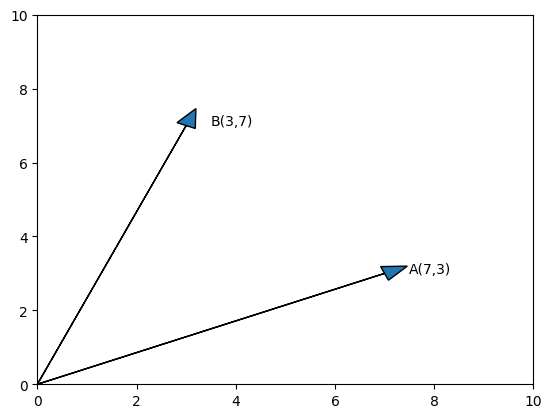

Cosine Similarity between A and B : 0.7241379310344827
Cosine Distance between A and B : 0.27586206896551735


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
A= np.array([7,3])
B= np.array([3,7])
ax=plt.axes()
ax.arrow(0.0,0.0,A[0],A[1],head_width=0.4,head_length=0.5)
plt.annotate(f"A({A[0]},{A[1]})",xy=(A[0],A[1]),xytext=(A[0]+0.5,A[1]))
ax.arrow(0.0,0.0,B[0],B[1],head_width=0.4,head_length=0.5)
plt.annotate(f"B({B[0]},{B[1]})",xy=(B[0],B[1]),xytext=(B[0]+0.5,B[1]))
plt.xlim(0,10)
plt.ylim(0,10)
plt.show()
plt.close()
cos_sim=np.dot(A,B)/(np.linalg.norm(A)*np.linalg.norm(B))
print(f"Cosine Similarity between A and B : {cos_sim}")
print(f"Cosine Distance between A and B : {1-cos_sim}")

In [ ]:
A = {1,2,3,4,6}
B = {1,2,5,8,9}
c = A.intersection(B)
D = A.union(B)
print('AnB =',c)
print('AuB =',D)
print('J(A,B) =', float(len(c))/float(len(D)))

AnB = {1, 2}
AuB = {1, 2, 3, 4, 5, 6, 8, 9}
J(A,B) = 0.25


In [ ]:
def jaccard_similarity(set1, set2):
  intersection = len(set1.intersection(set2))
  union = len(set1.union(set2))
  return intersection / union
set_a = {"Language","for","coumpter","NLP","Data Science"}
set_b = {"NLP","for","Language", "Data", "ML","AI"}
similarity = jaccard_similarity(set_a, set_b)
print("Jaccard Similarity:",similarity)

Jaccard Similarity: 0.375


In [ ]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
responses = ["you can return an item within 7 days of purchase.",
             "Our return policy allows you to return items that are unopened and in their original condition."
             "We offer frfree shipping on orders over $50."
             "To track your order, you can visit the 'Order Tracking' page and enter your order number."
             "Our customer support team is available from 9 AM to 6 PM, Monday through Friday."
             ]

In [ ]:
user_input = "How can i track my order?"

In [ ]:
vectorize = TfidfVectorizer(stop_words='english')
all_texts = responses + [user_input]

In [ ]:
Tfidf_matrix = vectorize.fit_transform(all_texts)

In [ ]:
user_vector = Tfidf_matrix[-1]
response_vectors = Tfidf_matrix[:-1]
cosine_similarities = cosine_similarity(user_vector, response_vectors)

In [ ]:
most_similar_idx = np.argmax(cosine_similarities)

In [ ]:
print(f"User Query: {user_input}")
print(f"Most relevant response: {responses[most_similar_idx]}")

User Query: How can i track my order?
Most relevant response: Our return policy allows you to return items that are unopened and in their original condition.We offer frfree shipping on orders over $50.To track your order, you can visit the 'Order Tracking' page and enter your order number.Our customer support team is available from 9 AM to 6 PM, Monday through Friday.


In [ ]:
import io
import random
import string
import warnings
warnings.filterwarnings('ignore')
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import nltk
from nltk.stem import WordNetLemmatizer


In [ ]:
nltk.download('popular', quiet=True)
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [1]:
f=open('input.txt','r',errors='ignore')
raw=f.read()
raw=raw.lower()

In [3]:
import nltk
nltk.download('punkt_tab')
sent_tokens = nltk.sent_tokenize(raw)
word_tokens = nltk.word_tokenize(raw)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [8]:
import string

In [9]:
lemmer=nltk.stem.WordNetLemmatizer()
def LemTokens(tokens):
  return [lemmer.lemmatize(token) for token in tokens]
remove_punct_dict=dict((ord(punct),None) for punct in string.punctuation)
def LemNormalize(text):
  return LemTokens(nltk.word_tokenize(text.lower().translate(remove_punct_dict)))

In [10]:
GREETINGS_INPUTS=("hello","hi","greetings","sup","what's up","hey")
GREETINGS_RESPONSES=["hi","hey","nods","hi there","hello","I am glad! You are talking to me"]
def greeting(sentence):
  for word in sentence.split():
    if word.lower() in GREETINGS_INPUTS:
      return random.choice(GREETINGS_RESPONSES)

In [12]:
def response(user_response):
  robo_response=''
  sent_tokens.append(user_response)
  TfidfVec = TfidfVectorizer(tokenizer=LemNormalize, stop_words='english')
  tfidf = Tfidfvec.fit_transform(sent_tokens)
  vals = cosine_similarity(tfidf[-1], tfidf)
  idx=vals.argsort()[0][-2]
  flat = vals.flatten()
  flat.sort()
  req_tfidf = flat[-2]
  if(req_tfidf==0):
    robo_response=robo_response+"I am sorry! I don't understand you"
    return robo_response
  else:
    robo_response = robo_response+sent_tokens[idx]
    return robo_response

In [13]:
flag=True
print("SABot: My name is SABot. How can I assist you?.\
If you want to exit, type Bye!")
while(flag==True):
  user_response = input()
  user_response=user_response.lower()
  if(user_response!='bye'):
    if(user_response=='thanks' or user_response=='thank you'):
      flag=False
      print("SABot: You are welcome..")
    else:
      if(greeting(user_response)!=None):
        print("SABot: "+greeting(user_response))
      else:
        print("SABot: ",end="")
        print(response(user_response))
        sent_tokens.remove(user_response)
  else:
    flag=False
    print("SABot: Bye! take care..")

SABot: My name is SABot. How can I assist you?.If you want to exit, type Bye!
thanks
SABot: You are welcome..
